# Gradient boosted trees for regression

In [1]:
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE


import sys
if not sys.path.__contains__('..'): sys.path.append('..') #hack to import from parent directory
from plot_utils import visualize_tree, grid_plot


First, we generate some (noisy) data on which to do regression.

In [10]:
np.random.seed(504)

In [3]:
X = np.linspace(0,30,100)

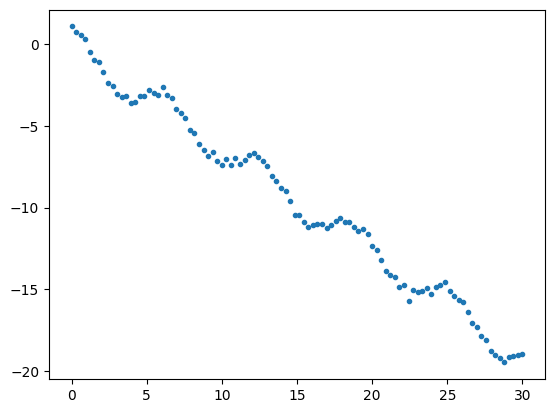

In [4]:
y_easy = np.array(np.cos(X)+(-2/np.pi)*X+np.random.normal(0,.2,100))

plt.plot(X, y_easy,'.')

In [11]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X.reshape(-1, 1), y_easy)

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.          0.3030303   0.6060606   0.90909094  1.2121212   1.5151515
  1.8181819   2.121212    2.4242425   2.7272727   3.030303    3.3333333
  3.6363637   3.939394    4.242424    4.5454545   4.848485    5.151515
  5.4545455   5.757576    6.060606    6.3636365   6.6666665   6.969697
  7.2727275   7.5757575   7.878788    8.181818    8.484848    8.787879
  9.090909    9.393939    9.69697    10.         10.30303    10.606061
 10.909091   11.212121   11.515152   11.818182   12.121212   12.424242
 12.727273   13.030303   13.333333   13.636364   13.939394   14.242424
 14.545455   14.848485   15.151515   15.454545   15.757576   16.060606
 16.363636   16.666666   16.969696   17.272728   17.575758   17.878788
 18.181818   18.484848   18.787878   19.09091    19.39394    19.69697
 20.         20.30303    20.60606    20.90909    21.212122   21.515152
 21.818182   22.121212   22.424242   22.727272   23.030304   23.333334
 23.636364   23.939394   24.242424   24.545454   24.848484   25.151516
 25.454546   25.757576   26.060606   26.363636   26.666666   26.969696
 27.272728   27.575758   27.878788   28.181818   28.484848   28.787878
 29.09091    29.39394    29.69697    30.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

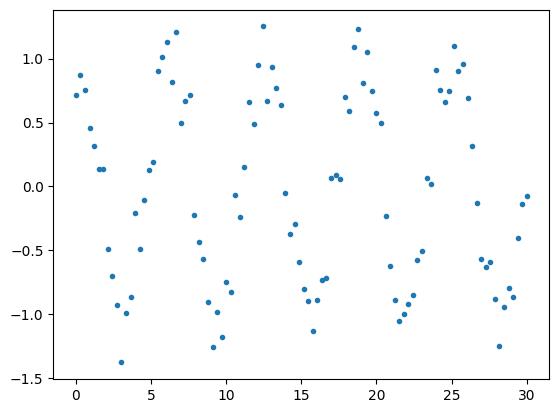

In [5]:
y = np.array(np.cos(X)+np.random.normal(0,.2,100)) #generating some noisy data

plt.plot(X, y,'.')

We split the data into a training and a test set.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, random_state = 42)

Here, we train and plot a sequence of gradient boosted trees, using between 1 and 15 trees. Notice how using one tree severely underfits the data, while using too many trees lead to overfitting. Somewhere in between, we have a decent model.

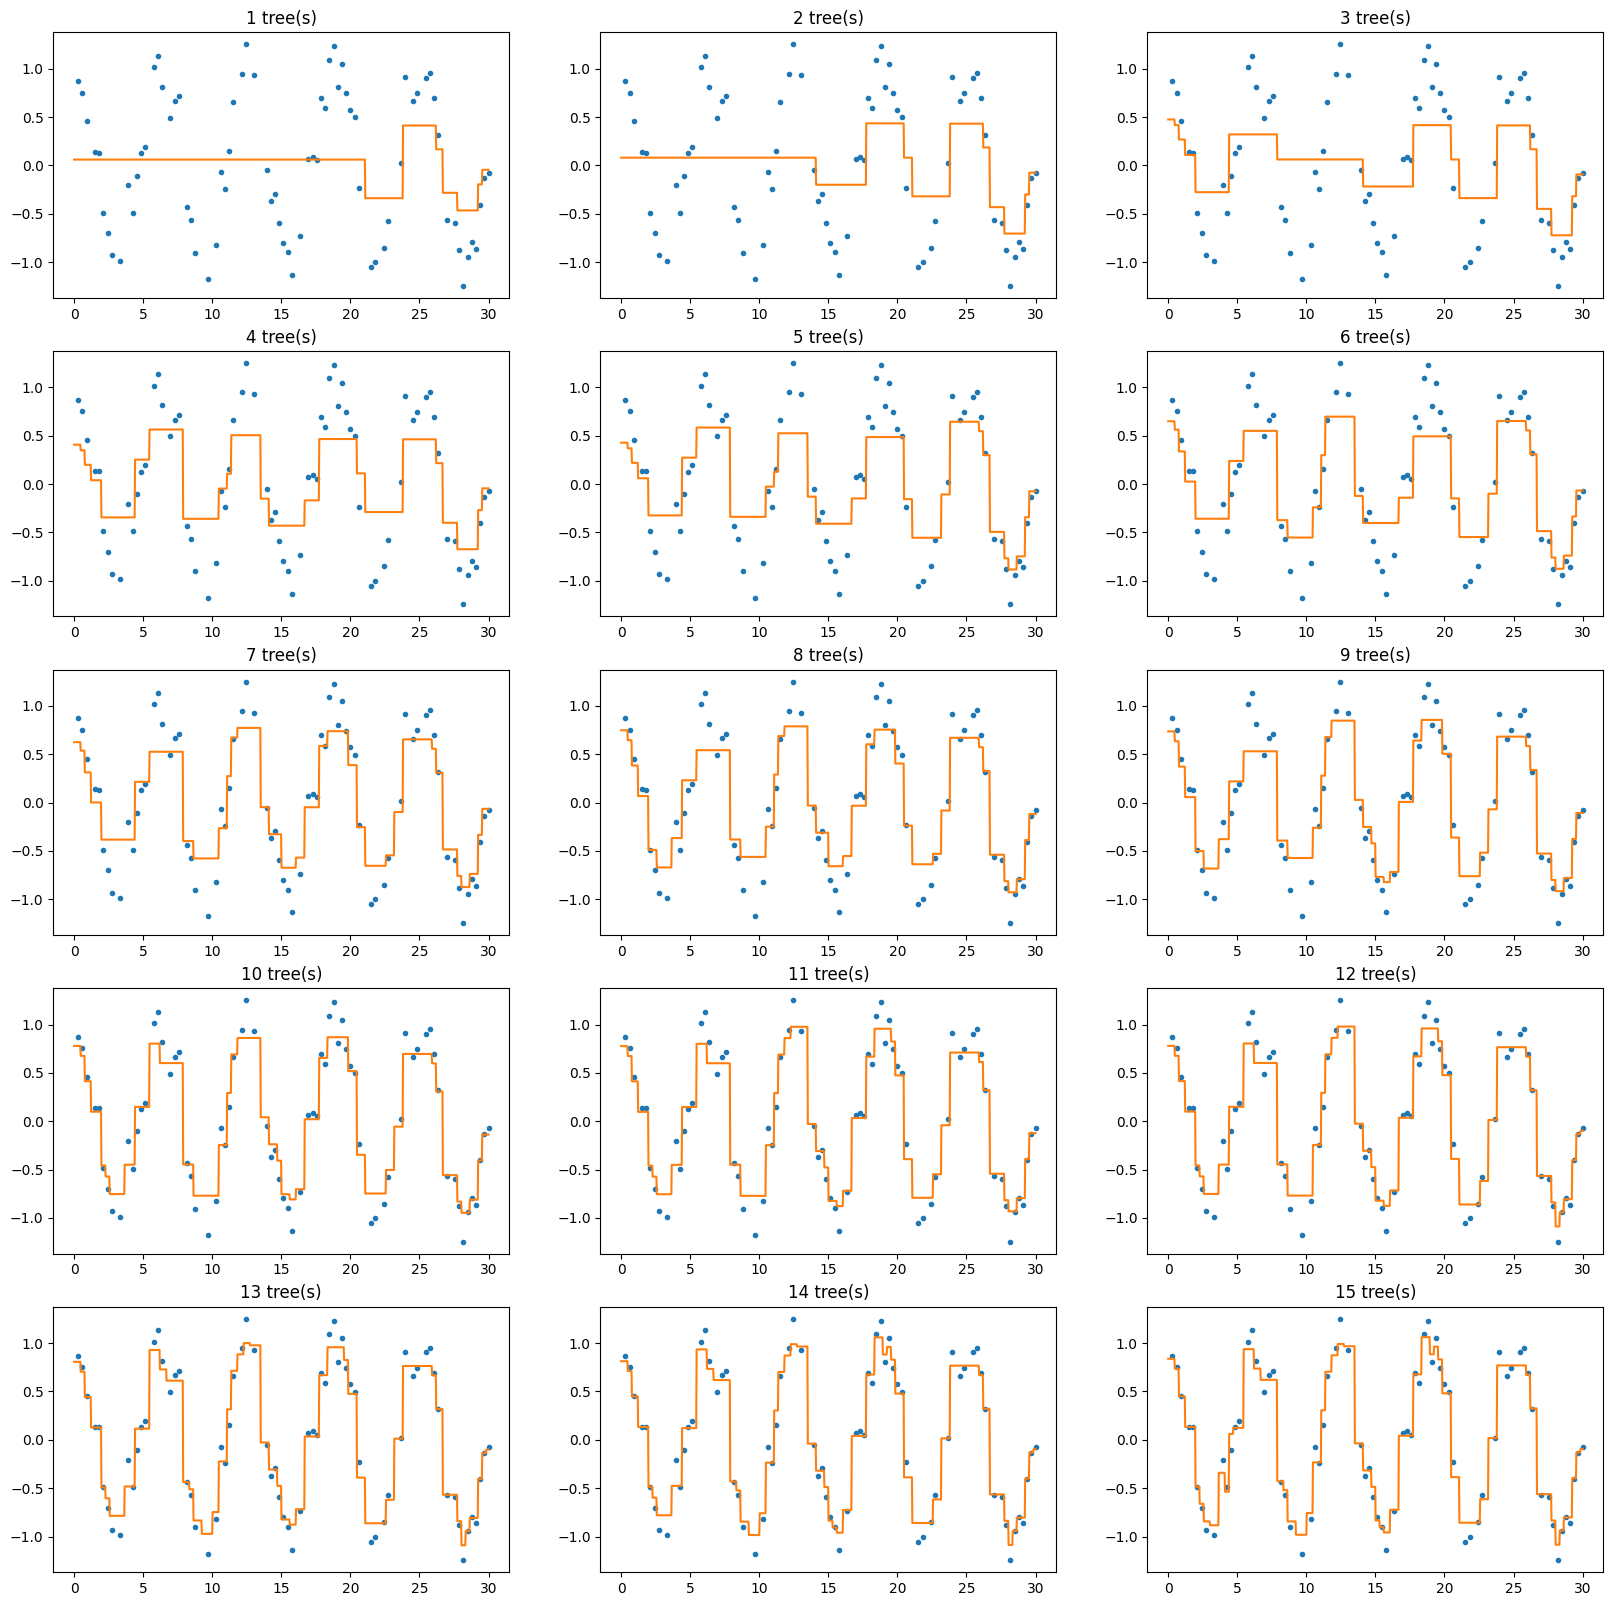

In [7]:
X_plot = np.linspace(0,30,1000)
X_plot = X_plot.reshape(-1, 1)

a = 5
b = 3
train_error = np.zeros([a*b])
test_error = np.zeros([a*b])
gbt = [None for i in range(a*b)]

fig, axes = plt.subplots(a,b, figsize = (20,20))
for i, ax in enumerate(zip(axes.ravel())):
    gbt[i] = GradientBoostingRegressor(random_state=42, n_estimators=i+1, max_depth=3, learning_rate=0.5)
    gbt[i].fit(X_train, y_train)
    
    train_error[i] = MSE(y_true = y_train, y_pred = gbt[i].predict(X_train))
    test_error[i] = MSE(y_true = y_test, y_pred = gbt[i].predict(X_test))
    
    ax[0].set_title("{} tree(s)".format(i+1))
    
    ax[0].plot(X_train,y_train,'.')
    ax[0].plot(X_plot,gbt[i].predict(X_plot),'-') #plot the actual trees

The way in which the algorithm works is by fitting tree n+1 to the _residuals_ of tree n, and then we add this "residual-tree" to the previous tree. Here, we plot the residuals and the "residual trees".

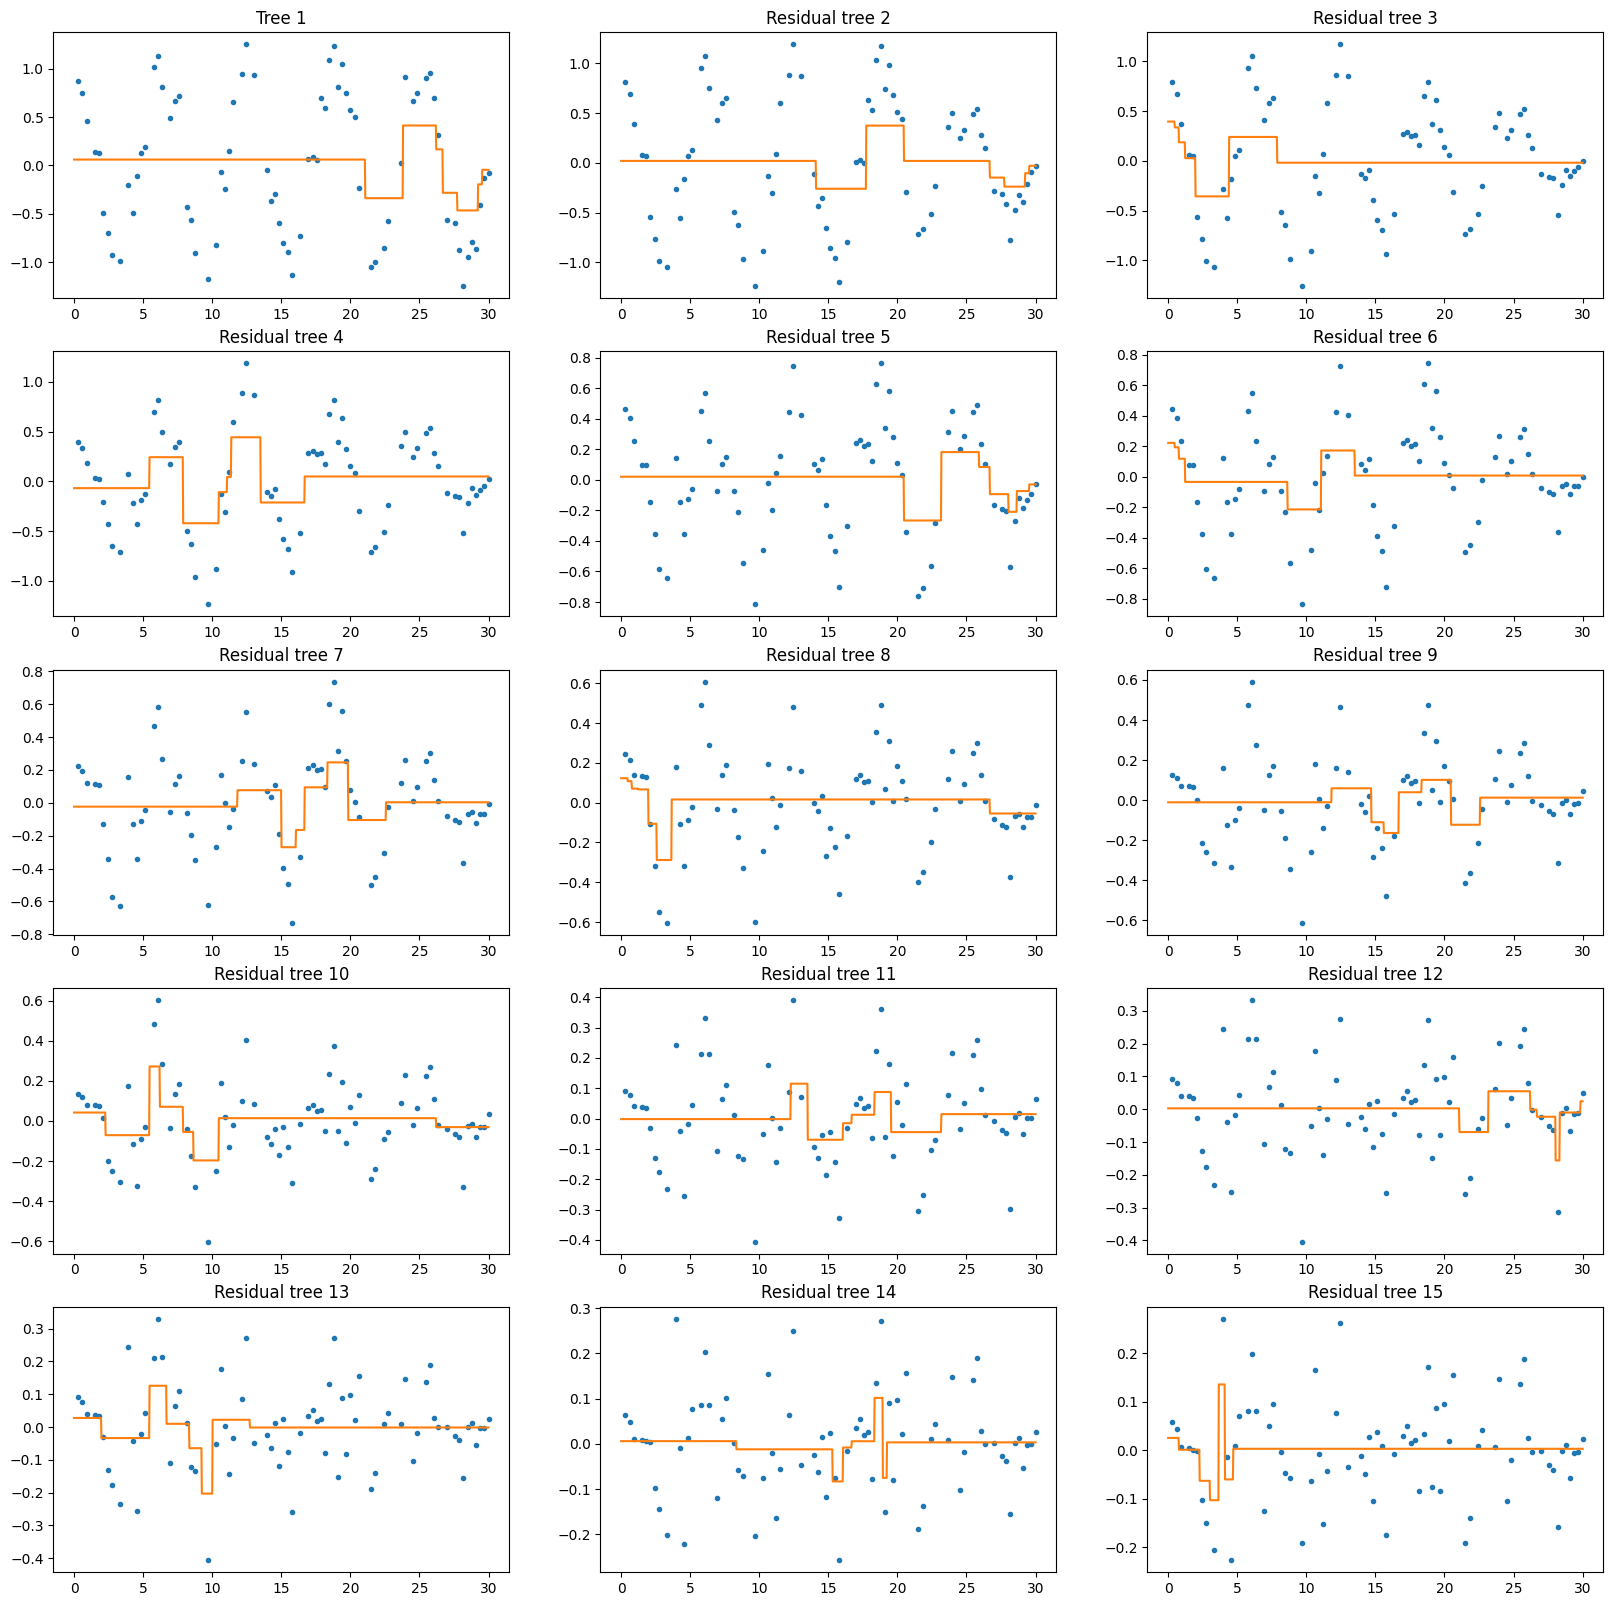

In [8]:
fig, axes = plt.subplots(a,b, figsize = (20,20))
for i, ax in enumerate(zip(axes.ravel())):
    if i == 0:
        ax[0].plot(X_train,y_train,'.')
        ax[0].plot(X_plot,gbt[i].predict(X_plot),'-')
        ax[0].set_title("Tree {}".format(i+1))
    else:
        ax[0].plot(X_train,y_train - gbt[i-1].predict(X_train),'.')
        ax[0].plot(X_plot,gbt[i].predict(X_plot) - gbt[i-1].predict(X_plot),'-')
        ax[0].set_title('Residual tree {}'.format(i+1))

Plot train and test error as a function of the number of trees.

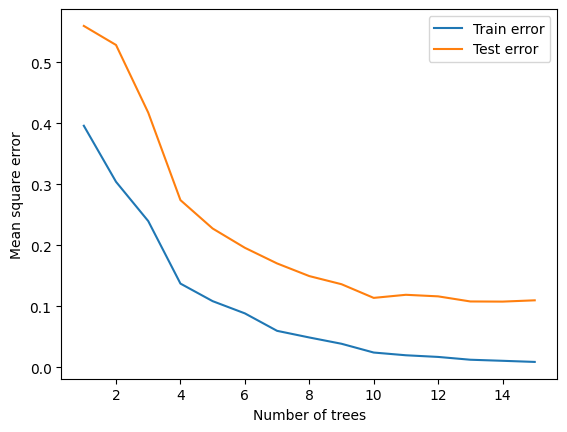

In [9]:
n_trees = range(1,a*b+1)
plt.plot(n_trees,train_error,'-', label = "Train error")
plt.plot(n_trees,test_error,'-', label = "Test error")
plt.xlabel("Number of trees")
plt.ylabel("Mean square error")
plt.legend()